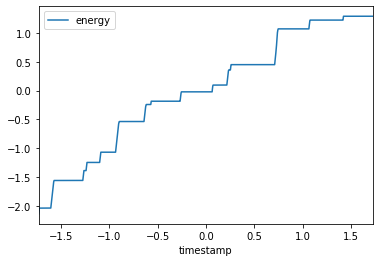

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
#import time-series from .csv file
df1 = pd.read_csv("/home/just/Scaricati/feed_53.MYD.csv",nrows=10000)
x = df1.iloc[:,0]
y = df1.iloc[:,1]

#scale and plot data
# Get column names first
names = df1.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df1)
scaled_df = pd.DataFrame(scaled_df, columns=names)
x = scaled_df.iloc[:,0]
y = scaled_df.iloc[:,1]
scaled_df.plot(x='timestamp',y='energy')

In [2]:
#split data into train and set with ratio of 70%/30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0,shuffle = False)

In [3]:
#make training and prediction with SVR using rbf kernel
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1000, gamma=0.0001)
y_pred = svr_rbf.fit(X_train.values.reshape(-1,1), y_train).predict(X_test.values.reshape(-1,1))
print("predizione effettuata")
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

predizione effettuata


In [4]:

#evaluate results
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
df.head()


Mean Absolute Error: 0.1536194489217706
Mean Squared Error: 0.03391517549640658
Root Mean Squared Error: 0.1841607327754931


,Actual,Predicted
7000,0.448603,0.737610
7001,0.448603,0.737946
7002,0.448603,0.738285
7003,0.448603,0.738604
7004,0.448603,0.738941


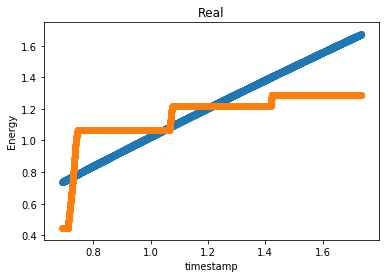

In [7]:
#plot predicted and real results and compare them
df2= pd.DataFrame({'timestamp': X_test,'' 'Predicted': y_pred, 'Real' : y_test})
plt.scatter(df2.timestamp,df2.Predicted)
plt.scatter(df2.timestamp,df2.Real)
plt.title('Real')
plt.xlabel('timestamp')
plt.ylabel('Energy')
plt.show()